In [1]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from datetime import datetime
import re
import matplotlib.pyplot as plt

In [2]:
def clean_tweet(tweet):
        # method for cleaning tweets used in clean_twitter_data dag

        tweet = re.sub(r'http\S+', '', tweet)
        # Remove mentions
        tweet = re.sub(r'@[A-Za-z0-9_]+', '', tweet)
        # Remove hashtags
        tweet = re.sub(r'#', '', tweet)
        # Remove non-alphabetic characters
        tweet = re.sub(r'[^a-zA-Z\s]', '', tweet)
        # Convert to lowercase
        tweet = tweet.lower()
        # Remove stop words
        stop_words = set(stopwords.words('english'))
        words = tweet.split()
        filtered_words = [word for word in words if word not in stop_words]
        return ' '.join(filtered_words)
    
def splitScore(df):
    df['negative'] = df['score'].apply(lambda x: x.get('neg'))
    df['neutral'] = df['score'].apply(lambda x: x.get('neu'))
    df['positive'] = df['score'].apply(lambda x: x.get('pos'))
    df['compound'] = df['score'].apply(lambda x: x.get('compound'))
    return df

In [3]:
tt2019 = pd.read_csv('twitter_2019.csv')
tt2020 = pd.read_csv('twitter_2020.csv')
tt2021 = pd.read_csv('twitter_2021.csv')
tt2022 = pd.read_csv('twitter_2022.csv')

In [4]:
fullDf = pd.concat([tt2019, tt2020, tt2021, tt2022])
fullDf

,Datetime,Text,Username,likeCount,Date
0,2019-01-01 19:25:18+00:00,2. AirPods will continue their dominance as th...,jmj,490,2019-01-01
1,2019-01-01 22:03:44+00:00,New way of living for 2019.\n\nBuy things I wa...,ACXtrades,112,2019-01-01
2,2019-01-01 01:35:46+00:00,Have a happy new year people may the $SPY $QQQ...,Sandro_power,68,2019-01-01
3,2019-01-01 13:19:28+00:00,$AAPL monthly testing support and moving on ex...,johnscharts,28,2019-01-01
4,2019-01-01 19:58:07+00:00,$SPX 2018 contributors: total return was -4.38...,hsilverb,12,2019-01-01
...,...,...,...,...,...
36495,2022-12-31 21:10:44+00:00,#music $aapl #inspirational #guitar #jazz #mod...,stonksrus,0,2022-12-31
36496,2022-12-31 21:08:20+00:00,Don't miss the next move in few hours: $AAPL $...,atkinsoncrypto,0,2022-12-31
36497,2022-12-31 21:06:51+00:00,**One member sold some at 7000%. You need play...,jakson70006751,0,2022-12-31
36498,2022-12-31 21:06:50+00:00,Thanks for the $1k\nDISCORD \n\nBest Discord t...,jakson70006751,0,2022-12-31


In [5]:
fullDf['cleanedText'] = fullDf['Text'].apply(lambda x: clean_tweet(x))
fullDf

,Datetime,Text,Username,likeCount,Date,cleanedText
0,2019-01-01 19:25:18+00:00,2. AirPods will continue their dominance as th...,jmj,490,2019-01-01,airpods continue dominance important aapl prod...
1,2019-01-01 22:03:44+00:00,New way of living for 2019.\n\nBuy things I wa...,ACXtrades,112,2019-01-01,new way living buy things want basically free ...
2,2019-01-01 01:35:46+00:00,Have a happy new year people may the $SPY $QQQ...,Sandro_power,68,2019-01-01,happy new year people may spy qqq iwm aapl amz...
3,2019-01-01 13:19:28+00:00,$AAPL monthly testing support and moving on ex...,johnscharts,28,2019-01-01,aapl monthly testing support moving expanding ...
4,2019-01-01 19:58:07+00:00,$SPX 2018 contributors: total return was -4.38...,hsilverb,12,2019-01-01,spx contributors total return contribution rev...
...,...,...,...,...,...,...
36495,2022-12-31 21:10:44+00:00,#music $aapl #inspirational #guitar #jazz #mod...,stonksrus,0,2022-12-31,music aapl inspirational guitar jazz modernjaz...
36496,2022-12-31 21:08:20+00:00,Don't miss the next move in few hours: $AAPL $...,atkinsoncrypto,0,2022-12-31,dont miss next move hours aapl intc amd nio sp...
36497,2022-12-31 21:06:51+00:00,**One member sold some at 7000%. You need play...,jakson70006751,0,2022-12-31,one member sold need plays like grow account u...
36498,2022-12-31 21:06:50+00:00,Thanks for the $1k\nDISCORD \n\nBest Discord t...,jakson70006751,0,2022-12-31,thanks k discord best discord trade group than...


In [6]:
sia = SentimentIntensityAnalyzer()
fullDf['score'] = fullDf['cleanedText'].apply(lambda x: sia.polarity_scores(x))
fullDf

,Datetime,Text,Username,likeCount,Date,cleanedText,score
0,2019-01-01 19:25:18+00:00,2. AirPods will continue their dominance as th...,jmj,490,2019-01-01,airpods continue dominance important aapl prod...,"{'neg': 0.0, 'neu': 0.825, 'pos': 0.175, 'comp..."
1,2019-01-01 22:03:44+00:00,New way of living for 2019.\n\nBuy things I wa...,ACXtrades,112,2019-01-01,new way living buy things want basically free ...,"{'neg': 0.0, 'neu': 0.654, 'pos': 0.346, 'comp..."
2,2019-01-01 01:35:46+00:00,Have a happy new year people may the $SPY $QQQ...,Sandro_power,68,2019-01-01,happy new year people may spy qqq iwm aapl amz...,"{'neg': 0.0, 'neu': 0.702, 'pos': 0.298, 'comp..."
3,2019-01-01 13:19:28+00:00,$AAPL monthly testing support and moving on ex...,johnscharts,28,2019-01-01,aapl monthly testing support moving expanding ...,"{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compou..."
4,2019-01-01 19:58:07+00:00,$SPX 2018 contributors: total return was -4.38...,hsilverb,12,2019-01-01,spx contributors total return contribution rev...,"{'neg': 0.38, 'neu': 0.511, 'pos': 0.109, 'com..."
...,...,...,...,...,...,...,...
36495,2022-12-31 21:10:44+00:00,#music $aapl #inspirational #guitar #jazz #mod...,stonksrus,0,2022-12-31,music aapl inspirational guitar jazz modernjaz...,"{'neg': 0.0, 'neu': 0.679, 'pos': 0.321, 'comp..."
36496,2022-12-31 21:08:20+00:00,Don't miss the next move in few hours: $AAPL $...,atkinsoncrypto,0,2022-12-31,dont miss next move hours aapl intc amd nio sp...,"{'neg': 0.0, 'neu': 0.912, 'pos': 0.088, 'comp..."
36497,2022-12-31 21:06:51+00:00,**One member sold some at 7000%. You need play...,jakson70006751,0,2022-12-31,one member sold need plays like grow account u...,"{'neg': 0.15, 'neu': 0.528, 'pos': 0.322, 'com..."
36498,2022-12-31 21:06:50+00:00,Thanks for the $1k\nDISCORD \n\nBest Discord t...,jakson70006751,0,2022-12-31,thanks k discord best discord trade group than...,"{'neg': 0.161, 'neu': 0.516, 'pos': 0.323, 'co..."


In [7]:
fullDf = splitScore(fullDf)
fullDf

,Datetime,Text,Username,likeCount,Date,cleanedText,score,negative,neutral,positive,compound
0,2019-01-01 19:25:18+00:00,2. AirPods will continue their dominance as th...,jmj,490,2019-01-01,airpods continue dominance important aapl prod...,"{'neg': 0.0, 'neu': 0.825, 'pos': 0.175, 'comp...",0.000,0.825,0.175,0.3818
1,2019-01-01 22:03:44+00:00,New way of living for 2019.\n\nBuy things I wa...,ACXtrades,112,2019-01-01,new way living buy things want basically free ...,"{'neg': 0.0, 'neu': 0.654, 'pos': 0.346, 'comp...",0.000,0.654,0.346,0.8779
2,2019-01-01 01:35:46+00:00,Have a happy new year people may the $SPY $QQQ...,Sandro_power,68,2019-01-01,happy new year people may spy qqq iwm aapl amz...,"{'neg': 0.0, 'neu': 0.702, 'pos': 0.298, 'comp...",0.000,0.702,0.298,0.8979
3,2019-01-01 13:19:28+00:00,$AAPL monthly testing support and moving on ex...,johnscharts,28,2019-01-01,aapl monthly testing support moving expanding ...,"{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compou...",0.000,0.690,0.310,0.4019
4,2019-01-01 19:58:07+00:00,$SPX 2018 contributors: total return was -4.38...,hsilverb,12,2019-01-01,spx contributors total return contribution rev...,"{'neg': 0.38, 'neu': 0.511, 'pos': 0.109, 'com...",0.380,0.511,0.109,-0.8591
...,...,...,...,...,...,...,...,...,...,...,...
36495,2022-12-31 21:10:44+00:00,#music $aapl #inspirational #guitar #jazz #mod...,stonksrus,0,2022-12-31,music aapl inspirational guitar jazz modernjaz...,"{'neg': 0.0, 'neu': 0.679, 'pos': 0.321, 'comp...",0.000,0.679,0.321,0.7964
36496,2022-12-31 21:08:20+00:00,Don't miss the next move in few hours: $AAPL $...,atkinsoncrypto,0,2022-12-31,dont miss next move hours aapl intc amd nio sp...,"{'neg': 0.0, 'neu': 0.912, 'pos': 0.088, 'comp...",0.000,0.912,0.088,0.1139
36497,2022-12-31 21:06:51+00:00,**One member sold some at 7000%. You need play...,jakson70006751,0,2022-12-31,one member sold need plays like grow account u...,"{'neg': 0.15, 'neu': 0.528, 'pos': 0.322, 'com...",0.150,0.528,0.322,0.7351
36498,2022-12-31 21:06:50+00:00,Thanks for the $1k\nDISCORD \n\nBest Discord t...,jakson70006751,0,2022-12-31,thanks k discord best discord trade group than...,"{'neg': 0.161, 'neu': 0.516, 'pos': 0.323, 'co...",0.161,0.516,0.323,0.8481


In [8]:
fullDf['week'] = fullDf['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date().isocalendar().week)
fullDf['year'] = fullDf['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date().isocalendar().year)
fullDf

,Datetime,Text,Username,likeCount,Date,cleanedText,score,negative,neutral,positive,compound,week,year
0,2019-01-01 19:25:18+00:00,2. AirPods will continue their dominance as th...,jmj,490,2019-01-01,airpods continue dominance important aapl prod...,"{'neg': 0.0, 'neu': 0.825, 'pos': 0.175, 'comp...",0.000,0.825,0.175,0.3818,1,2019
1,2019-01-01 22:03:44+00:00,New way of living for 2019.\n\nBuy things I wa...,ACXtrades,112,2019-01-01,new way living buy things want basically free ...,"{'neg': 0.0, 'neu': 0.654, 'pos': 0.346, 'comp...",0.000,0.654,0.346,0.8779,1,2019
2,2019-01-01 01:35:46+00:00,Have a happy new year people may the $SPY $QQQ...,Sandro_power,68,2019-01-01,happy new year people may spy qqq iwm aapl amz...,"{'neg': 0.0, 'neu': 0.702, 'pos': 0.298, 'comp...",0.000,0.702,0.298,0.8979,1,2019
3,2019-01-01 13:19:28+00:00,$AAPL monthly testing support and moving on ex...,johnscharts,28,2019-01-01,aapl monthly testing support moving expanding ...,"{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compou...",0.000,0.690,0.310,0.4019,1,2019
4,2019-01-01 19:58:07+00:00,$SPX 2018 contributors: total return was -4.38...,hsilverb,12,2019-01-01,spx contributors total return contribution rev...,"{'neg': 0.38, 'neu': 0.511, 'pos': 0.109, 'com...",0.380,0.511,0.109,-0.8591,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36495,2022-12-31 21:10:44+00:00,#music $aapl #inspirational #guitar #jazz #mod...,stonksrus,0,2022-12-31,music aapl inspirational guitar jazz modernjaz...,"{'neg': 0.0, 'neu': 0.679, 'pos': 0.321, 'comp...",0.000,0.679,0.321,0.7964,52,2022
36496,2022-12-31 21:08:20+00:00,Don't miss the next move in few hours: $AAPL $...,atkinsoncrypto,0,2022-12-31,dont miss next move hours aapl intc amd nio sp...,"{'neg': 0.0, 'neu': 0.912, 'pos': 0.088, 'comp...",0.000,0.912,0.088,0.1139,52,2022
36497,2022-12-31 21:06:51+00:00,**One member sold some at 7000%. You need play...,jakson70006751,0,2022-12-31,one member sold need plays like grow account u...,"{'neg': 0.15, 'neu': 0.528, 'pos': 0.322, 'com...",0.150,0.528,0.322,0.7351,52,2022
36498,2022-12-31 21:06:50+00:00,Thanks for the $1k\nDISCORD \n\nBest Discord t...,jakson70006751,0,2022-12-31,thanks k discord best discord trade group than...,"{'neg': 0.161, 'neu': 0.516, 'pos': 0.323, 'co...",0.161,0.516,0.323,0.8481,52,2022


### group by year and week and just take mean compound value

In [49]:
simpleWeeklyScore = fullDf.groupby(['year', 'week'], as_index = False).agg({'compound': 'mean', 'Date' : ['min', 'max']})
simpleWeeklyScore.columns = simpleWeeklyScore.columns.droplevel(0)
simpleWeeklyScore.columns = ['year', 'week', 'meanCompoundScore', 'start_date', 'end_date']
simpleWeeklyScore

,year,week,meanCompoundScore,start_date,end_date
0,2019,1,0.157929,2019-01-01,2019-01-06
1,2019,2,0.269742,2019-01-07,2019-01-13
2,2019,3,0.288365,2019-01-14,2019-01-20
3,2019,4,0.302199,2019-01-21,2019-01-27
4,2019,5,0.263979,2019-01-28,2019-02-03
...,...,...,...,...,...
204,2022,48,0.186129,2022-11-28,2022-12-04
205,2022,49,0.193400,2022-12-05,2022-12-11
206,2022,50,0.203228,2022-12-12,2022-12-18
207,2022,51,0.170613,2022-12-19,2022-12-25


### weight each compounded value according to its likeCount

In [10]:
def weighted_avg(df):
    weights = df['likeCount'] + 1
    return (df['compound'] * weights).sum() / weights.sum()

In [64]:
weightedWeeklyScore = fullDf.groupby(['year', 'week'], as_index = False).apply(weighted_avg)
weightedWeeklyScore.rename(columns = {None: 'weightedCompoundScore'}, inplace = True)
weightedWeeklyScore

,year,week,weightedCompoundScore
0,2019,1,0.083320
1,2019,2,0.191326
2,2019,3,0.260425
3,2019,4,0.170071
4,2019,5,0.115214
...,...,...,...
204,2022,48,0.091954
205,2022,49,0.099515
206,2022,50,0.095079
207,2022,51,0.029803


In [65]:
cols = ['year', 'week']
finalTable = pd.merge(simpleWeeklyScore, weightedWeeklyScore, how = 'left', left_on = cols, right_on = cols)
finalTable = finalTable[['year', 'week', 'start_date', 'end_date', 'meanCompoundScore', 'weightedCompoundScore']]
finalTable

,year,week,start_date,end_date,meanCompoundScore,weightedCompoundScore
0,2019,1,2019-01-01,2019-01-06,0.157929,0.083320
1,2019,2,2019-01-07,2019-01-13,0.269742,0.191326
2,2019,3,2019-01-14,2019-01-20,0.288365,0.260425
3,2019,4,2019-01-21,2019-01-27,0.302199,0.170071
4,2019,5,2019-01-28,2019-02-03,0.263979,0.115214
...,...,...,...,...,...,...
204,2022,48,2022-11-28,2022-12-04,0.186129,0.091954
205,2022,49,2022-12-05,2022-12-11,0.193400,0.099515
206,2022,50,2022-12-12,2022-12-18,0.203228,0.095079
207,2022,51,2022-12-19,2022-12-25,0.170613,0.029803


In [60]:
# positive sentiment : (compound score >= 0.05) 
# neutral sentiment : (compound score > -0.05) and (compound score < 0.05) 
# negative sentiment : (compound score <= -0.05)
def sentiment(score):
    if (score >= 0.05):
        return 'positive'
    elif (score <= -0.05):
        return 'negative'
    else:
        return 'neutral'

In [66]:
finalTable['weightedSentiment'] = finalTable['weightedCompoundScore'].apply(sentiment)
finalTable

,year,week,start_date,end_date,meanCompoundScore,weightedCompoundScore,weightedSentiment
0,2019,1,2019-01-01,2019-01-06,0.157929,0.083320,positive
1,2019,2,2019-01-07,2019-01-13,0.269742,0.191326,positive
2,2019,3,2019-01-14,2019-01-20,0.288365,0.260425,positive
3,2019,4,2019-01-21,2019-01-27,0.302199,0.170071,positive
4,2019,5,2019-01-28,2019-02-03,0.263979,0.115214,positive
...,...,...,...,...,...,...,...
204,2022,48,2022-11-28,2022-12-04,0.186129,0.091954,positive
205,2022,49,2022-12-05,2022-12-11,0.193400,0.099515,positive
206,2022,50,2022-12-12,2022-12-18,0.203228,0.095079,positive
207,2022,51,2022-12-19,2022-12-25,0.170613,0.029803,neutral


In [68]:
finalTable.to_csv('twitterComments.csv')

In [16]:
finalTable['weightedSentiment'].value_counts()

positive    203
neutral       6
Name: weightedSentiment, dtype: int64

(array([ 3., 10., 25., 34., 51., 42., 30.,  9.,  3.,  2.]),
 array([-0.02355354,  0.02590279,  0.07535913,  0.12481546,  0.17427179,
         0.22372812,  0.27318446,  0.32264079,  0.37209712,  0.42155345,
         0.47100979]),
 <BarContainer object of 10 artists>)

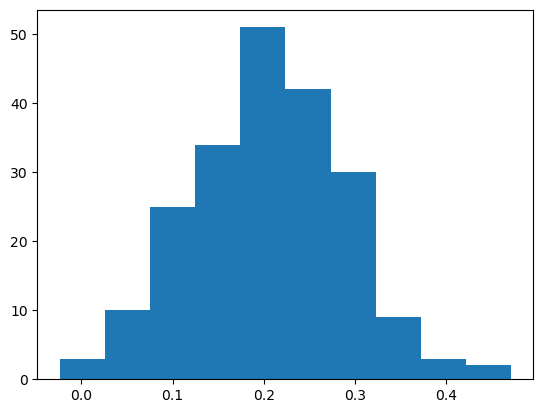

In [17]:
plt.hist(finalTable['WeightedCompoundScore'])

(array([ 4., 28., 66., 68., 24.,  9.,  3.,  3.,  3.,  1.]),
 array([0.04052943, 0.0896475 , 0.13876557, 0.18788364, 0.23700171,
        0.28611979, 0.33523786, 0.38435593, 0.433474  , 0.48259207,
        0.53171014]),
 <BarContainer object of 10 artists>)

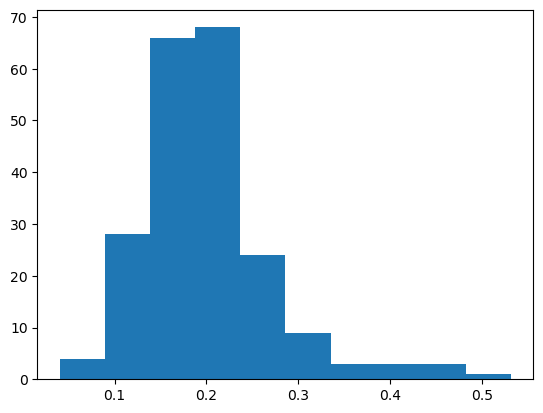

In [18]:
plt.hist(finalTable['compound'])